In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('covid.csv')
df.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,Transmission Classification
0,Global,Global,178503429,2290.108471,2504100,32.126333,281610,3872457,49.681659,60068,0.770642,6349,NaN
1,United States of America,Americas,33190195,10027.170000,49697,15.010000,0,596003,180.060000,1359,0.410000,0,Community transmission
2,India,South-East Asia,29977861,2172.300000,406980,29.490000,42640,389302,28.210000,12271,0.890000,1167,Clusters of cases
3,Brazil,Americas,17927928,8434.310000,515162,242.360000,44178,501825,236.090000,14424,6.790000,1025,Community transmission
4,France,Europe,5650315,8687.530000,14066,21.630000,290,109879,168.940000,307,0.470000,39,Community transmission


# Analysis of the data

In [3]:
df.shape

(238, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Name                                                          238 non-null    object 
 1   WHO Region                                                    238 non-null    object 
 2   Cases - cumulative total                                      238 non-null    int64  
 3   Cases - cumulative total per 100000 population                237 non-null    float64
 4   Cases - newly reported in last 7 days                         238 non-null    int64  
 5   Cases - newly reported in last 7 days per 100000 population   237 non-null    float64
 6   Cases - newly reported in last 24 hours                       238 non-null    int64  
 7   Deaths - cumulative total                                     238 non-n

In [5]:
df.describe()

,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
count,2.380000e+02,237.000000,2.380000e+02,237.000000,238.000000,2.380000e+02,237.000000,238.000000,237.000000,238.000000
mean,1.500029e+06,3446.690542,2.104286e+04,47.293951,2366.470588,3.254166e+04,58.113889,504.773109,0.807260,53.352941
std,1.196175e+07,3935.647056,1.682336e+05,103.720502,18788.044344,2.575600e+05,79.481695,4089.884322,1.787598,426.447480
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.863250e+03,232.210000,1.525000e+01,1.140000,0.000000,3.825000e+01,2.150000,0.000000,0.000000,0.000000
50%,4.003150e+04,1808.790000,3.565000e+02,10.880000,28.500000,7.285000e+02,21.670000,5.000000,0.090000,0.000000
75%,3.413772e+05,6207.970000,3.944500e+03,39.110000,396.500000,5.379000e+03,85.270000,65.000000,0.650000,6.750000
max,1.785034e+08,17943.440000,2.504100e+06,1006.640000,281610.000000,3.872457e+06,577.540000,60068.000000,11.200000,6349.000000


In [40]:
df.isnull().sum()
df['Transmission Classification'].fillna(df['Transmission Classification'].mode(),inplace=True)

In [41]:
# first of all lets make the list the categorical data
df_category=[feature for feature in df.columns if df[feature].dtype=='O']
df_category

['Name', 'WHO Region', 'Transmission Classification']

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


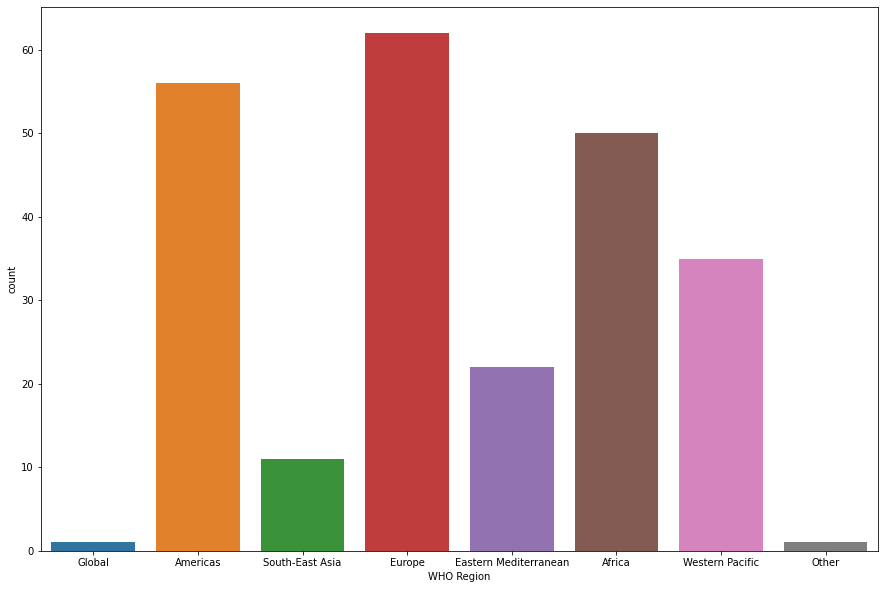

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


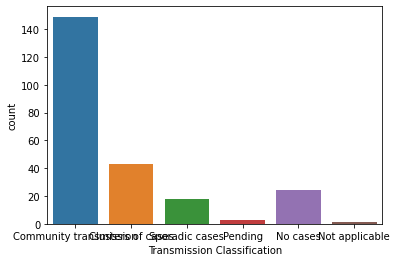

In [42]:
plt.figure(figsize=(15,10))
for category in df_category:
    if category!='Name':
        sns.countplot(df[category])
        plt.show()

In [43]:
df_numeric=[feature for feature in df.columns if feature not in df_category]
df_numeric

['Cases - cumulative total',
 'Cases - cumulative total per 100000 population',
 'Cases - newly reported in last 7 days',
 'Cases - newly reported in last 7 days per 100000 population',
 'Cases - newly reported in last 24 hours',
 'Deaths - cumulative total',
 'Deaths - cumulative total per 100000 population',
 'Deaths - newly reported in last 7 days',
 'Deaths - newly reported in last 7 days per 100000 population',
 'Deaths - newly reported in last 24 hours']

In [44]:
df['Cases - cumulative total'].values

array([178503429,  33190195,  29977861,  17927928,   5650315,   5375593,
         5350919,   4640511,   4268789,   4253460,   3945166,   3764651,
         3722782,   3105620,   2879030,   2477283,   2230142,   2029625,
         2018113,   1832479,   1679542,   1666192,   1522223,   1408835,
         1364239,   1292700,   1084636,   1080323,   1079640,    949175,
          865806,    861150,    840032,    807684,    786298,    747000,
          715841,    701019,    698872,    645609,    626343,    613993,
          543551,    526737,    475403,    466125,    446633,    422047,
          421152,    418548,    411153,    406220,    393727,    391385,
          385428,    360055,    359259,    354865,    353298,    341514,
          340967,    335521,    317645,    291801,    280854,    278466,
          277797,    275194,    269321,    263295,    260740,    257001,
          256187,    253875,    250572,    241820,    225365,    224330,
          220930,    204860,    191038,    179293, 

In [45]:
df_cont=[feature for feature in df_numeric if len(df[feature].values)>15]
df_cont

['Cases - cumulative total',
 'Cases - cumulative total per 100000 population',
 'Cases - newly reported in last 7 days',
 'Cases - newly reported in last 7 days per 100000 population',
 'Cases - newly reported in last 24 hours',
 'Deaths - cumulative total',
 'Deaths - cumulative total per 100000 population',
 'Deaths - newly reported in last 7 days',
 'Deaths - newly reported in last 7 days per 100000 population',
 'Deaths - newly reported in last 24 hours']

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


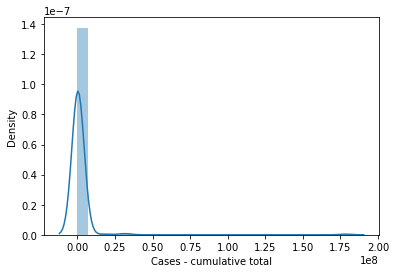

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


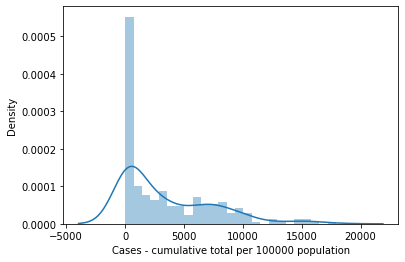

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


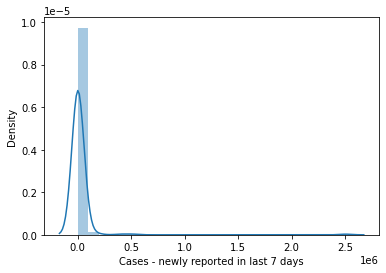

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


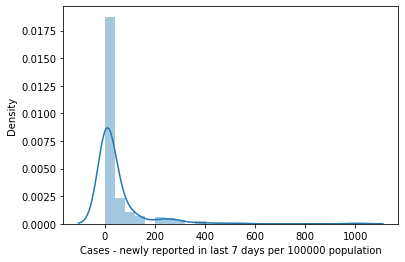

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


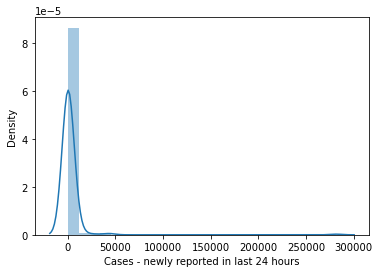

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


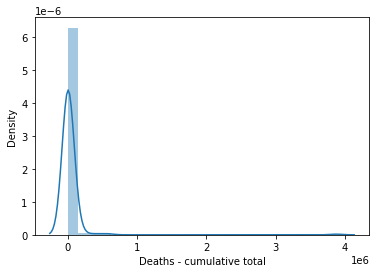

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


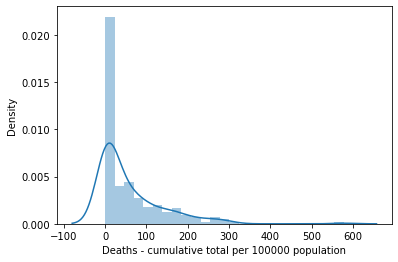

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


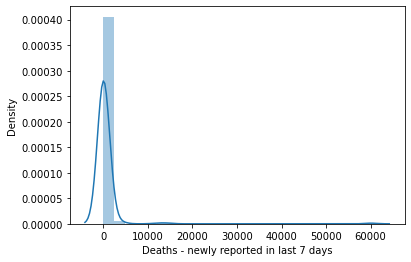

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


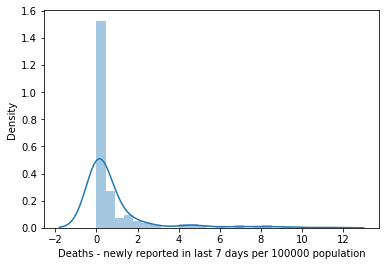

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


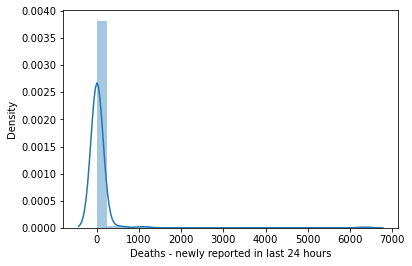

In [46]:
#lets plot histogram for continuous data and see if the data is normal or not
for feature in df_cont:
    sns.distplot(df[feature],bins=25)
    plt.show()

In [47]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [48]:
features=[feature for feature in df.columns if df[feature].dtypes!='O']
features

['Cases - cumulative total',
 'Cases - cumulative total per 100000 population',
 'Cases - newly reported in last 7 days',
 'Cases - newly reported in last 7 days per 100000 population',
 'Cases - newly reported in last 24 hours',
 'Deaths - cumulative total',
 'Deaths - cumulative total per 100000 population',
 'Deaths - newly reported in last 7 days',
 'Deaths - newly reported in last 7 days per 100000 population',
 'Deaths - newly reported in last 24 hours']

In [49]:
scaled=scalar.fit_transform(df[features])
scaled

array([[14.82863663, -0.29449538, 14.79068571, ..., 14.5942405 ,
        -0.02052789, 14.79411964],
       [ 2.65487532,  1.67555838,  0.17068251, ...,  0.20930351,
        -0.22270157, -0.1253739 ],
       [ 2.38575883, -0.32449243,  2.2988899 , ...,  2.8829725 ,
         0.04638348,  2.61695544],
       ...,
       [-0.12566641, -0.87761557, -0.12534479, ..., -0.12368   ,
        -0.45254505, -0.1253739 ],
       [-0.12566641, -0.87761557, -0.12534479, ..., -0.12368   ,
        -0.45254505, -0.1253739 ],
       [-0.12566641, -0.87761557, -0.12534479, ..., -0.12368   ,
        -0.45254505, -0.1253739 ]])

In [50]:
df_scaled=pd.DataFrame(scaled,columns=features)
df_scaled

,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
0,14.828637,-0.294495,14.790686,-0.146545,14.894154,14.940242,-0.106315,14.594241,-0.020528,14.794120
1,2.654875,1.675558,0.170683,-0.311918,-0.126222,2.192301,1.537514,0.209304,-0.222702,-0.125374
2,2.385759,-0.324492,2.298890,-0.172016,2.148090,1.388074,-0.377032,2.882972,0.046383,2.616955
3,1.376264,1.269975,2.943291,1.884670,2.230123,1.825875,2.243948,3.410503,3.353887,2.283270
4,0.347694,1.334452,-0.041559,-0.247957,-0.110754,0.300902,1.397311,-0.048459,-0.189066,-0.033728
...,...,...,...,...,...,...,...,...,...,...
233,-0.125666,-0.877616,-0.125345,-0.456940,-0.126222,-0.126612,-0.732708,-0.123680,-0.452545,-0.125374
234,-0.125666,-0.877616,-0.125345,-0.456940,-0.126222,-0.126612,-0.732708,-0.123680,-0.452545,-0.125374
235,-0.125666,-0.877616,-0.125345,-0.456940,-0.126222,-0.126612,-0.732708,-0.123680,-0.452545,-0.125374
236,-0.125666,-0.877616,-0.125345,-0.456940,-0.126222,-0.126612,-0.732708,-0.123680,-0.452545,-0.125374


In [84]:
df_scaled.isnull().sum()
df_scaled['Cases - cumulative total per 100000 population'].fillna(df_scaled['Cases - cumulative total per 100000 population'].mean(),inplace=True)
df_scaled['Cases - cumulative total per 100000 population'].isnull().sum()
df_scaled['Cases - newly reported in last 7 days per 100000 population'].fillna(df_scaled['Cases - newly reported in last 7 days per 100000 population'].mean(),inplace=True)
df_scaled['Deaths - cumulative total per 100000 population'].fillna(df_scaled['Deaths - cumulative total per 100000 population'].mean(),inplace=True)
df_scaled['Deaths - newly reported in last 7 days per 100000 population'].fillna(df_scaled['Deaths - newly reported in last 7 days per 100000 population'].mean(),inplace=True)

In [85]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
y=lbl.fit_transform(df['Transmission Classification'])

In [98]:
X=df_scaled
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(n_estimators=30)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=3,test_size=0.3)

In [99]:
x_train.shape

(166, 10)

In [100]:
x_test.isna().sum()

Cases - cumulative total                                        0
Cases - cumulative total per 100000 population                  0
Cases - newly reported in last 7 days                           0
Cases - newly reported in last 7 days per 100000 population     0
Cases - newly reported in last 24 hours                         0
Deaths - cumulative total                                       0
Deaths - cumulative total per 100000 population                 0
Deaths - newly reported in last 7 days                          0
Deaths - newly reported in last 7 days per 100000 population    0
Deaths - newly reported in last 24 hours                        0
dtype: int64

In [101]:
model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=30)

In [103]:
model.score(x_test,y_test)

0.75

In [104]:
y_pred=model.predict(x_test)

<AxesSubplot:>

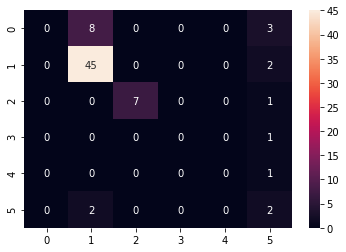

In [108]:
from sklearn.metrics import confusion_matrix
co=confusion_matrix(y_test,y_pred)
sns.heatmap(co,annot=True)